In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from fydyc_dataset import FydycDataset
import os

dataset = FydycDataset(csv_file='fydyc/fydyc_real.csv')
train_size = int(0.9 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])
train_dataloader = DataLoader(train_dataset, batch_size=10000, shuffle=True, num_workers=2)
valid_dataloader = DataLoader(valid_dataset, batch_size=10000, shuffle=True, num_workers=2)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class PolynomialRegression(nn.Module):
    def __init__(self, degree):
        super(PolynomialRegression, self).__init__()
        self.degree = degree
        # 对于二次多项式，需要3个参数：x^2, x和常数项
        self.linear = nn.Linear(degree + 1, 1)
    
    def forward(self, x):
        # 生成多项式特征
        poly_features = torch.cat([x ** i for i in range(self.degree + 1)], dim=1)
        # 应用线性层
        return self.linear(poly_features)

# 使用模型
degree = 2  # 二次多项式
model = PolynomialRegression(degree)

# 以下是模型的训练代码，这里只是为了完整性简单展示，并没有具体实现细节
criterion = nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

 10%|████▍                                       | 1/10 [00:29<04:21, 29.01s/it]

Train loss at epoch 0: 0.410264290869236
Valid loss at epoch 0: 0.40459397435188293


 20%|████████▊                                   | 2/10 [01:01<04:07, 30.98s/it]

Train loss at epoch 1: 0.39820633828639984
Valid loss at epoch 1: 0.3920440971851349


 30%|█████████████▏                              | 3/10 [01:29<03:26, 29.52s/it]

Train loss at epoch 2: 0.3855902925133705
Valid loss at epoch 2: 0.37976139783859253


 40%|█████████████████▌                          | 4/10 [01:57<02:53, 28.95s/it]

Train loss at epoch 3: 0.37203072756528854
Valid loss at epoch 3: 0.3677590489387512


 50%|██████████████████████                      | 5/10 [02:26<02:25, 29.11s/it]

Train loss at epoch 4: 0.36130864173173904
Valid loss at epoch 4: 0.3560490310192108


 60%|██████████████████████████▍                 | 6/10 [02:55<01:55, 28.97s/it]

Train loss at epoch 5: 0.3520766347646713
Valid loss at epoch 5: 0.34463807940483093


 70%|██████████████████████████████▊             | 7/10 [03:23<01:26, 28.82s/it]

Train loss at epoch 6: 0.3402449041604996
Valid loss at epoch 6: 0.3335229456424713


 80%|███████████████████████████████████▏        | 8/10 [03:52<00:57, 28.62s/it]

Train loss at epoch 7: 0.3291499763727188
Valid loss at epoch 7: 0.32271263003349304


 90%|███████████████████████████████████████▌    | 9/10 [04:19<00:28, 28.39s/it]

Train loss at epoch 8: 0.317317433655262
Valid loss at epoch 8: 0.3122096061706543


100%|███████████████████████████████████████████| 10/10 [04:48<00:00, 28.80s/it]

Train loss at epoch 9: 0.3051249235868454
Valid loss at epoch 9: 0.3020208775997162


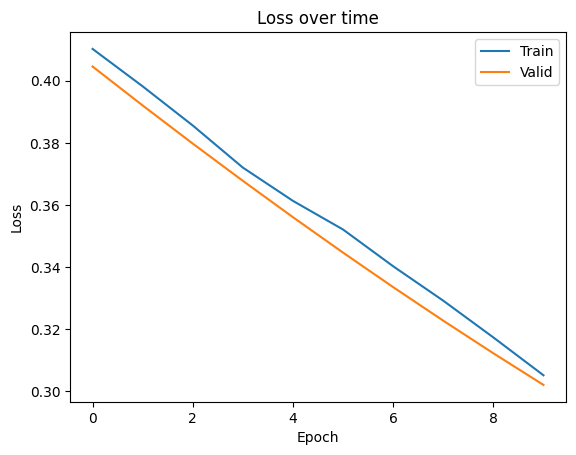

In [8]:
from tqdm import tqdm
import matplotlib.pyplot as plt
# model.to('cuda')
# device = torch.device("cuda:0")
# model = model.to(device)
# model = nn.DataParallel(model)  

# model.load_state_dict(torch.load('fydyc/model40.pth'))
# criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

train_losses = []  # 保存每个周期的训练损失
valid_losses = []  # 保存每个周期的验证损失
for epoch in tqdm(range(10)):
    # 训练阶段
    epoch_train_losses = []  # 保存每个批次的训练损失
    for data in train_dataloader:
        inputs, labels = data
        # inputs= inputs.to(device)
        # labels= labels.to(device)
        inputs = inputs.view(-1, 1)
        labels = labels.view(-1, 1)
        output = model(inputs)

        loss = criterion(output, labels)
        epoch_train_losses.append(loss.item())  # 保存每个批次的训练损失

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_train_loss = sum(epoch_train_losses) / len(epoch_train_losses)  # 计算每个周期的平均训练损失
    train_losses.append(epoch_train_loss)  # 保存每个周期的训练损失

    # 验证阶段
    epoch_valid_losses = []  # 保存每个批次的验证损失
    with torch.no_grad():  # 不需要计算梯度
        for data in valid_dataloader:
            inputs, labels = data
            # inputs= inputs.to(device)
            # labels= labels.to(device)
            inputs = inputs.view(-1, 1)
            labels = labels.view(-1, 1)
            output = model(inputs)

            loss = criterion(output, labels)
            epoch_valid_losses.append(loss.item())  # 保存每个批次的验证损失

    epoch_valid_loss = sum(epoch_valid_losses) / len(epoch_valid_losses)  # 计算每个周期的平均验证损失
    valid_losses.append(epoch_valid_loss)  # 保存每个周期的验证损失

    
    print(f"Train loss at epoch {epoch}: {epoch_train_loss}")
    print(f"Valid loss at epoch {epoch}: {epoch_valid_loss}")

# 绘制训练损失和验证损失
plt.plot(train_losses, label='Train')
plt.plot(valid_losses, label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over time')
plt.legend()
plt.show()


In [10]:
torch.save(model.state_dict(), 'fydyc/model44test.pth')
degree = 2  # 二次多项式
modeltest = PolynomialRegression(degree)
# modeltest = nn.DataParallel(modeltest) 
modeltest.load_state_dict(torch.load('fydyc/model44test.pth'))

<All keys matched successfully>

In [11]:
modeltest.load_state_dict(torch.load('fydyc/model44test.pth'))
model.eval()

# 测试值
test_value = 0.8
# 将测试值转换为二维Tensor，以匹配模型的期望输入格式
test_tensor = torch.tensor([[test_value]], dtype=torch.float32)

# 使用模型进行预测
with torch.no_grad():  # 确保不计算梯度，以节省计算资源
    prediction = model(test_tensor)

print(f"Prediction for input value {test_value}: {prediction.item()}")

Prediction for input value 0.8: 0.2552923560142517


In [12]:
import numpy as np
real_value = np.array([[11436]])  # 假设你的预测值是10
normalized_value = dataset.scaler_features.transform(real_value)
input_tensor = torch.from_numpy(normalized_value).float()
input_tensor = input_tensor.view(1, -1)  # 确保其形状与模型输入的形状相匹配
model.eval()  # 将模型设置为评估模式
with torch.no_grad():  # 不需要计算梯度
    output_tensor = model(input_tensor)
output_value = output_tensor.numpy()  # 将输出张量转换为 numpy 数组
predicted_value = dataset.scaler_labels.inverse_transform(output_value)
print(predicted_value)  # 打印预测值


[[12093.167]]
